# Re-code the house price machine learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

In [4]:
help(load_boston)

Help on function load_boston in module sklearn.datasets.base:

load_boston(return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============     ==============
    Samples total                 506
    Dimensionality                 13
    Features           real, positive
    Targets             real 5. - 50.
    ==============     ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the interesting attributes are:
        'data', the data to learn, 'target', the regression targets,
        'DESCR', the full description of the dataset,
        and 'filename', the physical location of bost

In [5]:
data = load_boston()

In [6]:
X, y = data["data"], data["target"]

In [7]:
X.shape, y.shape

((506, 13), (506,))

In [8]:
def draw_rm_and_price():
    return plt.scatter(X[:, 5], y)

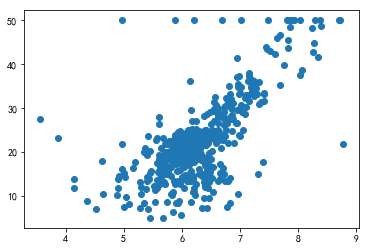

In [9]:
draw_rm_and_price()

In [10]:
def price(rm, k, b):
    return k * rm + b

In [11]:
X_rm = X[:, 5]
k = np.random.randint(-100, 100)
b = np.random.randint(-100, 100)

In [12]:
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

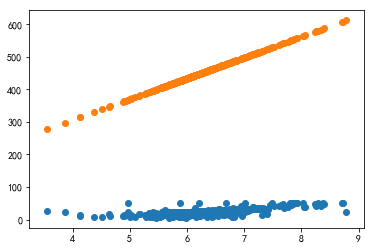

In [27]:
draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

- ÈÄâÊã©Â¶Ç‰∏ãÊçüÂ§±ÂáΩÊï∞
$$Loss = \frac{1}{2n}\sum(y_i - \hat{y_i})^2$$

In [13]:
def mean_squared_error(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / (2 * y.size)  # ÂàÜÊØçËÆ∞ÂæóÂä†Êã¨Âè∑

## Random Choose Method to get optimal *k* and *b*

In [54]:
trying_times = 2000

In [59]:
min_loss = float("inf")
best_k = best_b = None

for i in range(trying_times):
    k = np.random.random() * 200 - 100
    b = np.random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    
    current_loss = mean_squared_error(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        
        print("When time is: {time}, get best_k: {k}, get best_b: {b}, and the loss is: {loss}".format(time=i, k=best_k, b=best_b, loss=min_loss))

When time is: 0, get best_k: -55.000926219242665, get best_b: -10.116913955416564, and the loss is: 72593.48333234958
When time is: 1, get best_k: -41.90315450469488, get best_b: -89.09586607320041, and the loss is: 70965.68729090707
When time is: 2, get best_k: -10.002055760430721, get best_b: 52.66992254238258, and the loss is: 647.0790071259755
When time is: 33, get best_k: 13.338572073721508, get best_b: -87.7289503745246, and the loss is: 375.5920874430535
When time is: 43, get best_k: 6.778511157894471, get best_b: 1.0249086117651416, and the loss is: 245.57851594834213
When time is: 56, get best_k: 9.621158241357207, get best_b: -50.498451815294864, and the loss is: 100.81626211133846
When time is: 216, get best_k: 17.582524527068628, get best_b: -97.57803084002413, and the loss is: 85.70357821640042
When time is: 223, get best_k: 6.580800227185549, get best_b: -10.117634737308705, and the loss is: 61.27643146993331
When time is: 261, get best_k: 0.5466297601759607, get best_b: 

In [60]:
k = 8.364685056463927
b = -29.079869781987355
price_best_by_random_k_and_b = [price(r, k, b) for r in X_rm]

Text(0.5,1,'‰∏äËø∞ÊúÄ‰ºòÁöÑpriceÂíåÁúüÂÆûÁöÑpriceÂØπÊØîÊï£ÁÇπÂõæ')

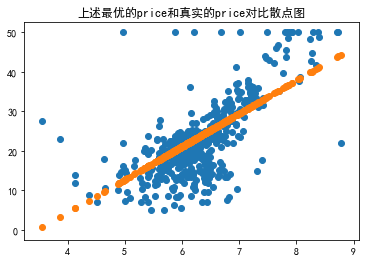

In [61]:
plt.scatter(X_rm, y)
plt.scatter(X_rm, price_best_by_random_k_and_b)
plt.title("‰∏äËø∞ÊúÄ‰ºòÁöÑpriceÂíåÁúüÂÆûÁöÑpriceÂØπÊØîÊï£ÁÇπÂõæ")

## Supervised Direction to get optimal *k* and *b*

In [14]:
import random

In [15]:
min_loss = float("inf")
trying_times = 2000

In [65]:
best_k = np.random.random() * 200 - 100
best_b = np.random.random() * 200 - 100

In [66]:
direction = [
    (+1, -1),
    (+1, +1),
    (-1, -1),
    (-1, +1)
]

In [67]:
next_direction = random.choice(direction)

In [68]:
scalar = 0.1

In [69]:
for i in range(trying_times):
    k_direction, b_direction = next_direction
    current_k, current_b = best_k + scalar * k_direction, best_b + scalar * b_direction
    price_by_random_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = mean_squared_error(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        best_k, best_b = current_k, current_b
        min_loss = current_loss
        if i % 100 == 0:
            print("When time is: {time}, get best_k: {k}, get best_b: {b}, and the loss is: {loss}".format(time=i, k=best_k, b=best_b, loss=min_loss))
    else:
        next_direction = random.choice(direction)

When time is: 0, get best_k: -97.55852142982836, get best_b: -30.0147752219602, and the loss is: 224380.79535512518
When time is: 100, get best_k: -87.65852142982892, get best_b: -39.91477522196034, and the loss is: 190426.96545478294
When time is: 200, get best_k: -77.65852142982949, get best_b: -49.91477522196048, and the loss is: 158957.96313014784
When time is: 300, get best_k: -67.65852142983006, get best_b: -59.914775221960625, and the loss is: 130330.96638792343
When time is: 400, get best_k: -57.658521429830174, get best_b: -69.91477522196034, and the loss is: 104545.9752281084
When time is: 500, get best_k: -47.65852142983003, get best_b: -79.91477522195977, and the loss is: 81602.98965070337
When time is: 600, get best_k: -37.65852142982989, get best_b: -89.9147752219592, and the loss is: 61502.00965570964
When time is: 700, get best_k: -27.658521429829747, get best_b: -99.91477522195864, and the loss is: 44243.03524312711
When time is: 800, get best_k: -17.658521429829605, g

In [70]:
k = 28.041478570170508
b = -155.2147752219555
price_best_by_supervised_direction_k_and_b = [price(r, k, b) for r in X_rm]

Text(0.5,1,'‰∏äËø∞ÊúÄ‰ºòÁöÑpriceÂíåÁúüÂÆûÁöÑpriceÂØπÊØîÊï£ÁÇπÂõæ')

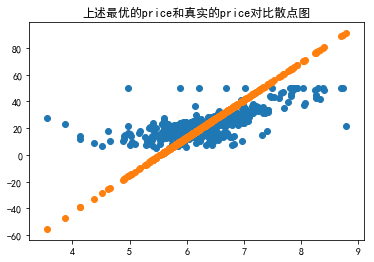

In [71]:
plt.scatter(X_rm, y)
plt.scatter(X_rm, price_best_by_supervised_direction_k_and_b)
plt.title("‰∏äËø∞ÊúÄ‰ºòÁöÑpriceÂíåÁúüÂÆûÁöÑpriceÂØπÊØîÊï£ÁÇπÂõæ")

## Gradient Descent to get optimal *k* and *b*

- Ê≠§ÂâçÊàë‰ª¨ÈÄâÊã©‰∫ÜÂ¶Ç‰∏ãÊçüÂ§±ÂáΩÊï∞
$$Loss = \frac{1}{2n}\sum(y_i - \hat{y_i})^2$$

- ÂØπ$\hat{y_i}$ËøõË°åÊ±ÇÂØº
$$\frac{\partial{L}}{\partial{\hat{y_i}}}=\hat{y_i} - y_i$$

- ÂØπ$kÂíåb$Ê±ÇÂÅèÂØº
$$\frac{\partial L}{\partial k}=\frac{1}{n}\sum\frac{\partial L}{\partial\hat{y_i}}*\frac{\partial\hat{y_i}}{\partial k}=\frac{1}{n}\sum{(\hat{y_i}-y_i)}x$$
$$\frac{\partial L}{\partial b}=\frac{1}{n}\sum\frac{\partial L}{\partial\hat{y_i}}=\frac{1}{n}\sum{(\hat{y_i}-y_i)}$$

In [76]:
def train_by_gradient_descend(it, lr):
    """
    it: iteration times
    lr: learning rate
    """
    k = random.random()
    b = random.random()
    
    for i in range(it):
        y_hat = np.array([price(r, k, b) for r in X_rm])
        if i % 100 == 0:
            print("When time is: {time}, get current k: {k}, current b: {b}, and the loss is: {loss}".format(time=i, k=k, b=b, loss=mean_squared_error(y, y_hat)))
        grad_y_hat = y_hat - y
        grad_k = (grad_y_hat * X_rm).sum() / X_rm.size
        grad_b = grad_y_hat.sum() / y.size
        
        k -= lr * grad_k
        b -= lr * grad_b
        
    return k, b  # ËøîÂõûÊúÄ‰Ω≥ÁöÑkÂíåb

In [77]:
k, b = train_by_gradient_descend(it=10000, lr=0.03)

When time is: 0, get current k: 0.6269813471817064, current b: 0.572059661971354, and the loss is: 201.8622540888463
When time is: 100, get current k: 3.6898269448836425, current b: -0.24245604188550077, and the loss is: 29.10216400912779
When time is: 200, get current k: 3.8816074530698725, current b: -1.4623944864144698, and the loss is: 28.59385737979302
When time is: 300, get current k: 4.066592350259945, current b: -2.6391052474489975, and the loss is: 28.1209355201307
When time is: 400, get current k: 4.245022434276577, current b: -3.7741200683558724, and the loss is: 27.68093518875761
When time is: 500, get current k: 4.4171299704365135, current b: -4.86891641622446, and the loss is: 27.271564618011084
When time is: 600, get current k: 4.58313899389403, current b: -5.924919405109419, and the loss is: 26.890691577142388
When time is: 700, get current k: 4.743265601271107, current b: -6.943503651124669, and the loss is: 26.53633226646686
When time is: 800, get current k: 4.8977182

When time is: 0, get current k: 0.4011542116990612, current b: 0.5641204249190361, and the loss is: 229.5545708910738
When time is: 100, get current k: 3.520430856183183, current b: 0.8350924664961105, and the loss is: 29.56639258629181
When time is: 200, get current k: 3.5538871643324645, current b: 0.6222729444105141, and the loss is: 29.473572149842248
When time is: 300, get current k: 3.587142936655717, current b: 0.4107290521592616, and the loss is: 29.381861100974028
When time is: 400, get current k: 3.6201993754935176, current b: 0.20045314373225318, and the loss is: 29.291246180313916
When time is: 500, get current k: 3.6530576756411035, current b: -0.008562381104020477, and the loss is: 29.201714286964428
When time is: 600, get current k: 3.6857190247321694, current b: -0.21632507702763723, and the loss is: 29.113252476609727
When time is: 700, get current k: 3.71818460328179, current b: -0.42284245343430155, and the loss is: 29.025847959644082
When time is: 800, get current k

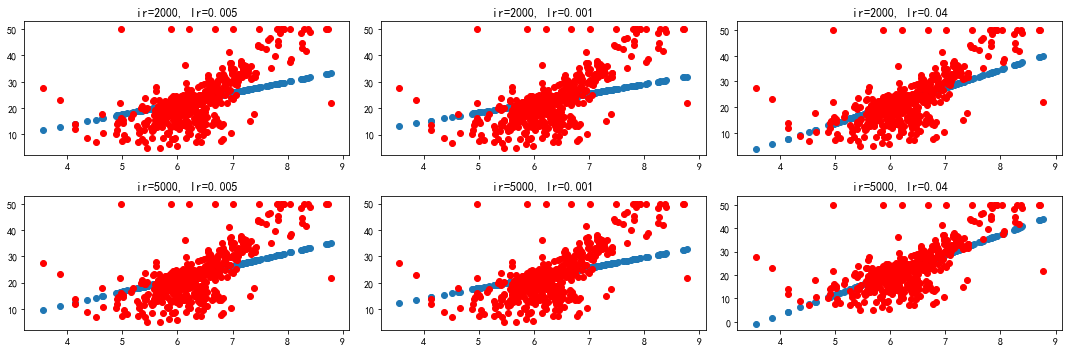

In [78]:
params = [(it, lr) for it in [2000, 5000] for lr in [0.005, 0.001, 0.04]]
fig, axes = plt.subplots(2, 3, figsize=(15, 5))  # Â§öÂõæÊòæÁ§∫

for axe, (it, lr) in zip(axes.flatten(), params):
    k, b = train_by_gradient_descend(it, lr)
    title = "ir={it}, lr={lr}".format(it=it, lr=lr)
    axe.set_title(title)
    axe.scatter(X_rm, [price(r, k, b) for r in X_rm])
    axe.scatter(X_rm, y, color="red")
fig.tight_layout()  # tight_layout‰ºöËá™Âä®Ë∞ÉÊï¥Â≠êÂõæÂèÇÊï∞Ôºå‰Ωø‰πãÂ°´ÂÖÖÊï¥‰∏™ÂõæÂÉèÂå∫Âüü

## Try different Loss function and learning rate. 

- For example, you can change the loss function: $Loss = \frac{1}{n} \sum({y_i - \hat{y_i}})^2$ $to$ $Loss = \frac{1}{n} \sum(|{y_i - \hat{y_i}}|)$. And you can change the learning rate and observe the performance.

In [17]:
def mean_absolute_error(y, y_hat):
    return np.abs(y_hat - y).sum() / y.size

In [18]:
def supervised_direction(scalar, loss_func):
    min_loss = float("inf")
    trying_times = 2000
    
    best_k = np.random.random() * 200 - 100
    best_b = np.random.random() * 200 - 100
    
    direction = [
        (+1, -1),
        (+1, +1),
        (-1, -1),
        (-1, +1)
    ]
    
    next_direction = random.choice(direction)
    
    for i in range(trying_times):
        k_direction, b_direction = next_direction
        current_k, current_b = best_k + scalar * k_direction, best_b + scalar * b_direction
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss_func(y, price_by_k_and_b)
        
        if current_loss < min_loss:
            best_k, best_b = current_k, current_b
            min_loss = current_loss
            
            if i % 100 == 0:
                print("When time is: {time}, get best_k: {k} best_b: {b}, and the loss is: {loss}".format(time=i, k=best_k, b=best_b, loss=min_loss))
        else:
            next_direction = random.choice(direction)
    return best_k, best_b

When time is: 0, get best_k: 43.408858418450514 best_b: 84.26129653580546, and the loss is: 56269.340566670944
When time is: 100, get best_k: 42.91385841845026 best_b: 84.756296535805, and the loss is: 55389.34139810535
When time is: 200, get best_k: 42.413858418450005 best_b: 85.25629653580455, and the loss is: 54507.522837935416
When time is: 300, get best_k: 41.91385841844975 best_b: 85.7562965358041, and the loss is: 53632.80929172161
When time is: 400, get best_k: 41.41385841844949 best_b: 86.25629653580364, and the loss is: 52765.20075946374
When time is: 500, get best_k: 40.91385841844924 best_b: 86.75629653580319, and the loss is: 51904.69724116202
When time is: 600, get best_k: 40.41385841844898 best_b: 87.25629653580273, and the loss is: 51051.298736816156
When time is: 700, get best_k: 39.913858418448726 best_b: 87.75629653580228, and the loss is: 50205.005246426445
When time is: 800, get best_k: 39.41385841844847 best_b: 88.25629653580182, and the loss is: 49365.81676999281

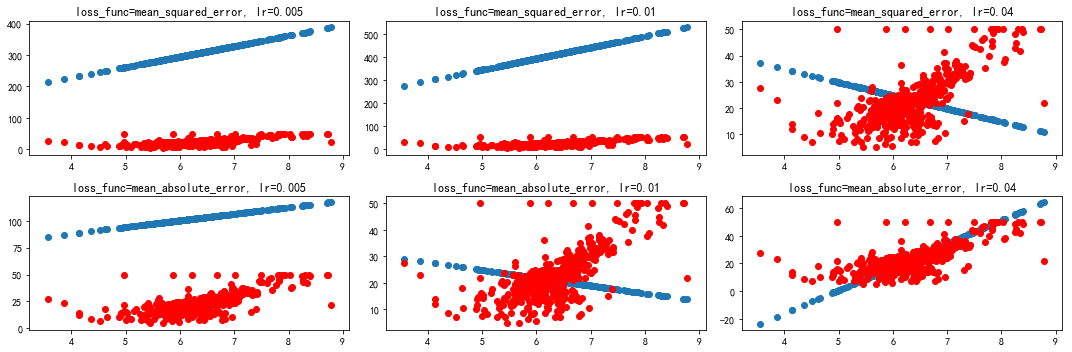

In [19]:
params = [(loss, lr) for loss in [mean_squared_error, mean_absolute_error] for lr in [0.005, 0.01, 0.04]]
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

for axe, (loss, lr) in zip(axes.flatten(), params):
    k, b = supervised_direction(lr, loss)  # ÂáΩÊï∞ÁöÑËøîÂõûÂÄºÂ∞±ÊòØk, b
    title = "loss_func={loss_func}, lr={lr}".format(loss_func=loss.__name__, lr=lr)  # Â¶ÇÊûú‰∏çÂä†__name__ÔºåÂàôËøîÂõûÁöÑÂ∞±ÊòØ<function mean_squared_error at 0x0000016C23D08AE8>
    axe.set_title(title)
    axe.scatter(X_rm, [price(r, k, b) for r in X_rm])
    axe.scatter(X_rm, y, color="red")
fig.tight_layout()

# Answer following questions:


## Why do we need machine learning methods instead of creating a complicated formula ?


- Â§çÊùÇÁöÑÂÖ¨Âºè‰ºöÈöèÁùÄÊï∞ÊçÆÁöÑÊîπÂèòÈúÄË¶ÅÊàë‰ª¨‰∫∫‰∏∫Âú∞ËøõË°å‰øÆÊîπÔºåËÄå‰∏îÂΩìÂÖ≥Á≥ªÂ§çÊùÇÂà∞‰∏ÄÂÆöÁ®ãÂ∫¶Êó∂ÔºåÊàë‰ª¨ÂæàÈöæÈÄöËøáËßÇÂØüÊâæÂà∞ÂÖ∂‰∏≠ÁöÑÂÖ≥Á≥ª„ÄÇ
- Êú∫Âô®Â≠¶‰π†ÊñπÊ≥ïÂü∫‰∫éÊï∞ÊçÆÈ©±Âä®ÔºåÂÆÉ‰ºöÈöèÁùÄÊï∞ÊçÆÁöÑÊîπÂèòËÄåËá™ÂèëÂ≠¶ÂæóÂØπÂ∫îÁöÑÂ§çÊùÇÂÖ≥Á≥ª„ÄÇ

## Wha't's the disadvantages of the 1st Random Choosen methods in our course ? 

- ÊØ´Êó†ÊñπÂêëÊÄß„ÄÇÂ¶ÇÊûúÊêúÁ¥¢Ê¨°Êï∞‰∏çÂ§üÂ§öÔºåÈöèÊú∫ÂÄºËåÉÂõ¥‰∏çÂ•ΩÔºåÂæàÈöæÂæóÂà∞Â•ΩÁªìÊûú„ÄÇ

## Is the 2nd method supervised direction better than 1st one?  What's the disadvantages of the 2nd supversied directin method ? 

- ÊØîÁ¨¨‰∏ÄÁßçÊñπÊ≥ïÊõ¥Â•Ω„ÄÇÂõ†‰∏∫ÂÆÉÊúâ‰∏ÄÂÆöÁöÑÊñπÂêëÊÄßÔºåÂΩìÂèÇÊï∞ÂêëÊçüÂ§±Êõ¥Â∞èÁöÑÊñπÂêëÊõ¥Êñ∞Êó∂ÔºåÂàôÁªßÁª≠‰øùÊåÅËøô‰∏™Ê≠£Á°ÆÁöÑÊñπÂêëÔºåÂê¶ÂàôÈöèÊú∫ÁªôÂá∫‰∏Ä‰∏™ÊñπÂêë„ÄÇ
- Á¨¨‰∫åÁßçÊñπÊ≥ïÁöÑÁº∫ÁÇπÊòØÂè™Êúâ4‰∏™ÊñπÂêëÔºåÊûÅÊúâÂèØËÉΩÊó†Ê≥ïÈÄâÊã©Âà∞ÊúÄÂ•ΩÁöÑÊñπÂêë„ÄÇ

## Why do we use Derivative / Gredient to fit a target function ? 

- Ë¥üÊ¢ØÂ∫¶ÊñπÂêëÊòØÂáΩÊï∞‰∏ãÈôçÊúÄÂø´ÁöÑÊñπÂêë„ÄÇ

## In the words 'Gredient Descent', what's the Gredient and what's the Descent ?

- Ê¢ØÂ∫¶ÊòØÊçüÂ§±ÂáΩÊï∞ÂØπÂèÇÊï∞ÁöÑÂÅèÂØºÊï∞Ôºå‰∏ãÈôç‰ª£Ë°®‰∫ÜÊåâÁÖßÊ¢ØÂ∫¶ÁöÑË¥üÊñπÂêë„ÄÇ

## What's the advantages of the 3rd gradient descent method compared to the previous methods ?

- ËøôÁßçÊñπÊ≥ïÊúâ‰∫ÜÊòéÁ°ÆÁöÑÊñπÂêëÔºåÂπ∂‰∏îÊØè‰∏ÄÊ¨°ÈÉΩÊúùÁùÄÊçüÂ§±ÂáΩÊï∞ÂèòÂ∞èÁöÑÊñπÂêëÊõ¥Êñ∞„ÄÇ

## Using the simple words to describe: What's the machine leanring.

- ËæìÂÖ•$x„ÄÅy$‰ª•ÂèäÂ≠¶‰π†ÊñπÊ≥ïÂêéÔºåËæìÂá∫$x‰∏éy$‰πãÈó¥ÁöÑÂØπÂ∫îÂÖ≥Á≥ª„ÄÇ

# Finish the search problem

## Beijing Subway System

- Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

<img src="timg.jpg", width=800, height=800>

### Dataflow

#### Get data from Webpage.

> a.	Get web page source from: [baike](https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485)

> b.	You may need @package [requests](https://2.python-requests.org/en/master/) page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package [beautiful soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

#### Preprocessing data from page source

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

### Build the search agent


> Build the search agent based on the graph we build.

> For example, when you run: **search('Â••‰Ωì‰∏≠ÂøÉ', 'Â§©ÂÆâÈó®')**

> You need get the result: **Â••‰Ωì‰∏≠ÂøÉ -> A -> B -> C -> ... -> Â§©ÂÆâÈó®**

## Shanghai Subway System

### Dataflow

- ‰ªé‰∏äÊµ∑Âú∞ÈìÅÁôæÂ∫¶ÁôæÁßëÁà¨ÂèñÊï∞ÊçÆ

<img src="Ê≠£ÂàôË°®ËææÂºè2.png">

#### Get data from Webpage

In [1]:
from bs4 import BeautifulSoup as bs
import requests
import re

In [2]:
sh_metro_url = "https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%81/1273732?fr=aladdin"
headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.100 Safari/537.36',
    'connection': 'keep-alive',
    'host': 'baike.baidu.com',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'zh-CN,zh;q=0.9,en;q=0.8',
    'upgrade-insecure-requests': '1'
}

In [3]:
# Ëé∑ÂèñÈ°µÈù¢Êï∞ÊçÆ
page = requests.get(sh_metro_url, headers=headers)

ConnectionError: ('Connection aborted.', OSError("(10054, 'WSAECONNRESET')",))

In [ ]:
content = page.content.decode("utf-8")  # contentÂåÖÂê´Ë¶ÅÂåπÈÖçÁöÑÈìæÊé•

In [ ]:
page.status_code  # ËøîÂõûhttpÂçèËÆÆÁöÑÁä∂ÊÄÅÁ†ÅÔºå200Ë°®Á§∫ÊúçÂä°Âô®Â∑≤ÊàêÂäüÂ§ÑÁêÜËØ∑Ê±Ç

#### Preprocessing data from page source

In [140]:
# soup = bs(content)

In [13]:
# ÂåπÈÖçÊ≠£ÂàôË°®ËææÂºèÔºåÊâìÂºÄË¶ÅÁà¨ÂèñÁöÑÁΩëÂùÄÔºåÊü•ÁúãÁΩëÈ°µÊ∫êÁ†ÅÔºåÊêúÁ¥¢Ë¶ÅÁà¨ÂèñÁöÑ‰ø°ÊÅØÔºåÊâæÂà∞Á±ª‰ººÂ¶Ç‰∏ãÂÖ≥ÈîÆÂè•
# <a target=_blank href="/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF/12092650" data-lemmaid="12092650">‰∏äÊµ∑Âú∞ÈìÅ1Âè∑Á∫ø</a>
# ()ÊòØ‰∏∫‰∫ÜÊèêÂèñÂåπÈÖçÁöÑÂ≠óÁ¨¶‰∏≤ÔºåË°®ËææÂºè‰∏≠ÊúâÂá†‰∏™()Â∞±ÊúâÂá†‰∏™Áõ∏Â∫îÁöÑÂåπÈÖçÂ≠óÁ¨¶‰∏≤
# []ÊòØÂÆö‰πâÂåπÈÖçÁöÑÂ≠óÁ¨¶ËåÉÂõ¥
line_pattern = re.compile(pattern=r'<a target=_blank href="(/item/[\d\w%]+/\d+)" data-lemmaid="\d+">(‰∏äÊµ∑[\w\d]+Á∫ø)</a>')

In [14]:
all_lines = {}  # Á©∫Â≠óÂÖ∏

In [15]:
for link, line in line_pattern.findall(content):
    if line in all_lines:
        continue
    all_lines[line] = "https://baike.baidu.com" + link

In [16]:
all_lines

{'‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF/12419281',
 '‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8111%E5%8F%B7%E7%BA%BF/22948326',
 '‰∏äÊµ∑Âú∞ÈìÅ12Âè∑Á∫ø': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8112%E5%8F%B7%E7%BA%BF/12062373',
 '‰∏äÊµ∑Âú∞ÈìÅ13Âè∑Á∫ø': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF/22948511',
 '‰∏äÊµ∑Âú∞ÈìÅ16Âè∑Á∫ø': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF/12025028',
 '‰∏äÊµ∑Âú∞ÈìÅ17Âè∑Á∫ø': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%8117%E5%8F%B7%E7%BA%BF/22948512',
 '‰∏äÊµ∑Âú∞ÈìÅ1Âè∑Á∫ø': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF/12092650',
 '‰∏äÊµ∑Âú∞ÈìÅ2Âè∑Á∫ø': 'https://baike.baidu.com/item/%E4%B8%8A%E6%B5%B7%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF/22947836',
 '‰∏äÊµ∑Âú∞ÈìÅ3Âè∑Á∫

In [17]:
first_line = requests.get(all_lines["‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø"], headers=headers)

In [18]:
first_line.status_code  # 200Ë°®Á§∫È°µÈù¢ÂìçÂ∫îÈúÄÊ±Ç

200

In [19]:
c = first_line.content.decode("utf-8")

In [20]:
soup = bs(c)

C:\Users\JeremySun\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\JeremySun\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [21]:
station_pattern = re.compile(r'<td.+>([\w\d]+Á´ô)')

In [22]:
def get_stations(soup):
    stations = []
    for h3 in soup.find_all("h3"):
        if h3.contents[-1] != "ËΩ¶Á´ôÂàóË°®":
            continue
        par = h3.parent
        for sib in par.next_siblings:
            if sib.name == "table":
                for s in sib.children:
                    if s.contents:
                        stat = str(s.contents[0])
                        mat = station_pattern.search(stat)
                        if mat and len(mat.group(1)) < 10 and mat.group(1) != "ËΩ¶Á´ô":
                            stations.append(mat.group(1))
                return stations

In [23]:
get_stations(soup=soup)  # ÊèêÂèñÂá∫Á´ôÁÇπ

['ËéòÂ∫ÑÁ´ô',
 'Êò•Áî≥Ë∑ØÁ´ô',
 'Èì∂ÈÉΩË∑ØÁ´ô',
 'È¢õÊ°•Á´ô',
 'ÂåóÊ°•Á´ô',
 'ÂâëÂ∑ùË∑ØÁ´ô',
 '‰∏úÂ∑ùË∑ØÁ´ô',
 'Ê±üÂ∑ùË∑ØÁ´ô',
 'Ë•øÊ∏°Á´ô',
 'ËêßÂ°òÁ´ô',
 'Â•âÊµ¶Â§ßÈÅìÁ´ô',
 'ÁéØÂüé‰∏úË∑ØÁ´ô',
 'ÊúõÂõ≠Ë∑ØÁ´ô',
 'ÈáëÊµ∑ÊπñÁ´ô',
 'Â•âË¥§Êñ∞ÂüéÁ´ô',
 'ÈáëÂπ≥Ë∑ØÁ´ô',
 'ÂçéÂÆÅË∑ØÁ´ô',
 'Êñá‰∫ïË∑ØÁ´ô',
 'ÈóµË°åÂºÄÂèëÂå∫Á´ô']

In [24]:
from collections import defaultdict

In [25]:
def get_all_stations(lines):
    all_stations = defaultdict(list)
    for line, url in lines.items():
        resp = requests.get(url, headers=headers)
        contents = resp.content.decode("utf-8")
        soup = bs(contents)
        stations = get_stations(soup)
        all_stations[line].extend(stations)
    return all_stations

In [26]:
all_stations = get_all_stations(all_lines)

C:\Users\JeremySun\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\JeremySun\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [27]:
all_stations

defaultdict(list,
            {'‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø': ['Ëà™‰∏≠Ë∑ØÁ´ô',
              'Á¥´Ëó§Ë∑ØÁ´ô',
              'ÈæôÊüèÊñ∞ÊùëÁ´ô',
              'ËôπÊ°•ÁÅ´ËΩ¶Á´ôÁ´ô',
              'ËôπÊ°•2Âè∑Ëà™Á´ôÊ•ºÁ´ô',
              'ËôπÊ°•1Âè∑Ëà™Á´ôÊ•ºÁ´ô',
              '‰∏äÊµ∑Âä®Áâ©Âõ≠Á´ô',
              'ÈæôÊ∫™Ë∑ØÁ´ô',
              'Ê∞¥ÂüéË∑ØÁ´ô',
              '‰ºäÁäÅË∑ØÁ´ô',
              'ÂÆãÂõ≠Ë∑ØÁ´ô',
              'ËôπÊ°•Ë∑ØÁ´ô',
              '‰∫§ÈÄöÂ§ßÂ≠¶Á´ô',
              '‰∏äÊµ∑Âõæ‰π¶È¶ÜÁ´ô',
              'ÈôïË•øÂçóË∑ØÁ´ô',
              'Êñ∞Â§©Âú∞Á´ô',
              'ËÄÅË•øÈó®Á´ô',
              'Ë±´Âõ≠Á´ô',
              'Âçó‰∫¨‰∏úË∑ØÁ´ô',
              'Â§©ÊΩºË∑ØÁ´ô',
              'ÂõõÂ∑ùÂåóË∑ØÁ´ô',
              'Êµ∑‰º¶Ë∑ØÁ´ô',
              'ÈÇÆÁîµÊñ∞ÊùëÁ´ô',
              'ÂõõÂπ≥Ë∑ØÁ´ô',
              'ÂêåÊµéÂ§ßÂ≠¶Á´ô',
              'ÂõΩÊùÉË∑ØÁ´ô',
              '‰∫îËßíÂú∫Á´ô',
              'Ê±üÊπæ‰ΩìËÇ≤Âú∫Á´ô',
              '‰∏âÈó®Ë∑ØÁ´ô',
              'ÊÆ∑È´ò‰∏úË∑

In [28]:
for line, stations in all_stations.items():
    print("{line}‰∏ÄÂÖ±Êúâ{stations}‰∏™Á´ô".format(line=line, stations=len(stations)))

‰∏äÊµ∑Âú∞ÈìÅ3Âè∑Á∫ø‰∏ÄÂÖ±Êúâ29‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ17Âè∑Á∫ø‰∏ÄÂÖ±Êúâ13‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ1Âè∑Á∫ø‰∏ÄÂÖ±Êúâ28‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ12Âè∑Á∫ø‰∏ÄÂÖ±Êúâ32‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ6Âè∑Á∫ø‰∏ÄÂÖ±Êúâ28‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ16Âè∑Á∫ø‰∏ÄÂÖ±Êúâ13‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ4Âè∑Á∫ø‰∏ÄÂÖ±Êúâ27‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø‰∏ÄÂÖ±Êúâ31‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ7Âè∑Á∫ø‰∏ÄÂÖ±Êúâ33‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø‰∏ÄÂÖ±Êúâ39‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ13Âè∑Á∫ø‰∏ÄÂÖ±Êúâ31‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ2Âè∑Á∫ø‰∏ÄÂÖ±Êúâ30‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ9Âè∑Á∫ø‰∏ÄÂÖ±Êúâ35‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø‰∏ÄÂÖ±Êúâ19‰∏™Á´ô
‰∏äÊµ∑Á£ÅÊµÆÂàóËΩ¶Á§∫ËåÉËøêËê•Á∫ø‰∏ÄÂÖ±Êúâ2‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅÊµ¶Ê±üÁ∫ø‰∏ÄÂÖ±Êúâ6‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ8Âè∑Á∫ø‰∏ÄÂÖ±Êúâ30‰∏™Á´ô


- **ËØ¥Êòé**
    - 4Âè∑Á∫ø‰∏∫ÁéØÁ∫ø
    - 11Âè∑Á´ôÈôàÁøîË∑ØÁ´ôÂ∞öÊú™ÂºÄÈÄö

In [29]:
all_stations["‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø"]

['ËéòÂ∫ÑÁ´ô',
 'Êò•Áî≥Ë∑ØÁ´ô',
 'Èì∂ÈÉΩË∑ØÁ´ô',
 'È¢õÊ°•Á´ô',
 'ÂåóÊ°•Á´ô',
 'ÂâëÂ∑ùË∑ØÁ´ô',
 '‰∏úÂ∑ùË∑ØÁ´ô',
 'Ê±üÂ∑ùË∑ØÁ´ô',
 'Ë•øÊ∏°Á´ô',
 'ËêßÂ°òÁ´ô',
 'Â•âÊµ¶Â§ßÈÅìÁ´ô',
 'ÁéØÂüé‰∏úË∑ØÁ´ô',
 'ÊúõÂõ≠Ë∑ØÁ´ô',
 'ÈáëÊµ∑ÊπñÁ´ô',
 'Â•âË¥§Êñ∞ÂüéÁ´ô',
 'ÈáëÂπ≥Ë∑ØÁ´ô',
 'ÂçéÂÆÅË∑ØÁ´ô',
 'Êñá‰∫ïË∑ØÁ´ô',
 'ÈóµË°åÂºÄÂèëÂå∫Á´ô']

In [30]:
# all_stations["‰∏äÊµ∑Âú∞ÈìÅ4Âè∑Á∫ø"].pop()
all_stations["‰∏äÊµ∑Âú∞ÈìÅ4Âè∑Á∫ø"]

['ÂÆúÂ±±Ë∑ØÁ´ô',
 '‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô',
 '‰∏äÊµ∑‰ΩìËÇ≤Âú∫Á´ô',
 '‰∏úÂÆâË∑ØÁ´ô',
 'Â§ßÊú®Ê°•Ë∑ØÁ´ô',
 'È≤ÅÁè≠Ë∑ØÁ´ô',
 'Ë•øËóèÂçóË∑ØÁ´ô',
 'ÂçóÊµ¶Â§ßÊ°•Á´ô',
 'Â°òÊ°•Á´ô',
 'ËìùÊùëË∑ØÁ´ô',
 'Êµ¶ÁîµË∑ØÁ´ô',
 '‰∏ñÁ∫™Â§ßÈÅìÁ´ô',
 'Êµ¶‰∏úÂ§ßÈÅìÁ´ô',
 'Êù®Ê†ëÊµ¶Ë∑ØÁ´ô',
 'Â§ßËøûË∑ØÁ´ô',
 '‰∏¥Âπ≥Ë∑ØÁ´ô',
 'Êµ∑‰º¶Ë∑ØÁ´ô',
 'ÂÆùÂ±±Ë∑ØÁ´ô',
 '‰∏äÊµ∑ÁÅ´ËΩ¶Á´ôÁ´ô',
 '‰∏≠ÊΩ≠Ë∑ØÁ´ô',
 'ÈïáÂù™Ë∑ØÁ´ô',
 'ÊõπÊù®Ë∑ØÁ´ô',
 'ÈáëÊ≤ôÊ±üË∑ØÁ´ô',
 '‰∏≠Â±±ÂÖ¨Âõ≠Á´ô',
 'Âª∂ÂÆâË•øË∑ØÁ´ô',
 'ËôπÊ°•Ë∑ØÁ´ô',
 'ÂÆúÂ±±Ë∑ØÁ´ô']

In [31]:
# all_stations["‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø"].remove("ÈôàÁøîË∑ØÁ´ô")
all_stations["‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø"]

['Ëä±Ê°•Á´ô',
 'ÂÖâÊòéË∑ØÁ´ô',
 'ÂÖÜ‰∏∞Ë∑ØÁ´ô',
 'ÂÆâ‰∫≠Á´ô',
 '‰∏äÊµ∑Ê±ΩËΩ¶ÂüéÁ´ô',
 'ÊòåÂêâ‰∏úË∑ØÁ´ô',
 '‰∏äÊµ∑ËµõËΩ¶Âú∫Á´ô',
 'ÂòâÂÆöÂåóÁ´ô',
 'ÂòâÂÆöË•øÁ´ô',
 'ÁôΩÈì∂Ë∑ØÁ´ô',
 'ÂòâÂÆöÊñ∞ÂüéÁ´ô',
 'È©¨ÈôÜÁ´ô',
 'ÈôàÁøîË∑ØÁ´ô',
 'ÂçóÁøîÁ´ô',
 'Ê°ÉÊµ¶Êñ∞ÊùëÁ´ô',
 'Ê≠¶Â®ÅË∑ØÁ´ô',
 'Á•ÅËøûÂ±±Ë∑ØÁ´ô',
 'ÊùéÂ≠êÂõ≠Á´ô',
 '‰∏äÊµ∑Ë•øÁ´ôÁ´ô',
 'ÁúüÂ¶ÇÁ´ô',
 'Êû´Ê°•Ë∑ØÁ´ô',
 'ÊõπÊù®Ë∑ØÁ´ô',
 'ÈöÜÂæ∑Ë∑ØÁ´ô',
 'Ê±üËãèË∑ØÁ´ô',
 '‰∫§ÈÄöÂ§ßÂ≠¶Á´ô',
 'ÂæêÂÆ∂Ê±áÁ´ô',
 '‰∏äÊµ∑Ê∏∏Ê≥≥È¶ÜÁ´ô',
 'ÈæôÂçéÁ´ô',
 '‰∫ëÈî¶Ë∑ØÁ´ô',
 'ÈæôËÄÄË∑ØÁ´ô',
 '‰∏úÊñπ‰ΩìËÇ≤‰∏≠ÂøÉÁ´ô',
 '‰∏âÊûóÁ´ô',
 '‰∏âÊûó‰∏úÁ´ô',
 'Êµ¶‰∏âË∑ØÁ´ô',
 'Âæ°Ê°•Á´ô',
 'ÁΩóÂ±±Ë∑ØÁ´ô',
 'ÁßÄÊ≤øË∑ØÁ´ô',
 'Â∫∑Êñ∞ÂÖ¨Ë∑ØÁ´ô',
 'Ëø™Â£´Â∞ºÁ´ô']

- Â§ÑÁêÜÊîØÁ∫ø

In [32]:
# Â§ÑÁêÜ5Âè∑Á∫øÊîØÁ∫ø
all_stations["‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø‰∏ªÁ∫ø"] = all_stations["‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø"][:15]
all_stations["‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫øÊîØÁ∫ø"] = all_stations["‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø"][15:]
all_stations.pop("‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø")

['ËéòÂ∫ÑÁ´ô',
 'Êò•Áî≥Ë∑ØÁ´ô',
 'Èì∂ÈÉΩË∑ØÁ´ô',
 'È¢õÊ°•Á´ô',
 'ÂåóÊ°•Á´ô',
 'ÂâëÂ∑ùË∑ØÁ´ô',
 '‰∏úÂ∑ùË∑ØÁ´ô',
 'Ê±üÂ∑ùË∑ØÁ´ô',
 'Ë•øÊ∏°Á´ô',
 'ËêßÂ°òÁ´ô',
 'Â•âÊµ¶Â§ßÈÅìÁ´ô',
 'ÁéØÂüé‰∏úË∑ØÁ´ô',
 'ÊúõÂõ≠Ë∑ØÁ´ô',
 'ÈáëÊµ∑ÊπñÁ´ô',
 'Â•âË¥§Êñ∞ÂüéÁ´ô',
 'ÈáëÂπ≥Ë∑ØÁ´ô',
 'ÂçéÂÆÅË∑ØÁ´ô',
 'Êñá‰∫ïË∑ØÁ´ô',
 'ÈóµË°åÂºÄÂèëÂå∫Á´ô']

In [33]:
# Â§ÑÁêÜ10Âè∑Á∫øÊîØÁ∫ø
all_stations["‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø‰∏ªÁ∫ø"] = all_stations["‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø"][3:]
all_stations["‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫øÊîØÁ∫ø"] = all_stations["‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø"][:3] + [all_stations["‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø"][7]]
all_stations.pop("‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø")

['Ëà™‰∏≠Ë∑ØÁ´ô',
 'Á¥´Ëó§Ë∑ØÁ´ô',
 'ÈæôÊüèÊñ∞ÊùëÁ´ô',
 'ËôπÊ°•ÁÅ´ËΩ¶Á´ôÁ´ô',
 'ËôπÊ°•2Âè∑Ëà™Á´ôÊ•ºÁ´ô',
 'ËôπÊ°•1Âè∑Ëà™Á´ôÊ•ºÁ´ô',
 '‰∏äÊµ∑Âä®Áâ©Âõ≠Á´ô',
 'ÈæôÊ∫™Ë∑ØÁ´ô',
 'Ê∞¥ÂüéË∑ØÁ´ô',
 '‰ºäÁäÅË∑ØÁ´ô',
 'ÂÆãÂõ≠Ë∑ØÁ´ô',
 'ËôπÊ°•Ë∑ØÁ´ô',
 '‰∫§ÈÄöÂ§ßÂ≠¶Á´ô',
 '‰∏äÊµ∑Âõæ‰π¶È¶ÜÁ´ô',
 'ÈôïË•øÂçóË∑ØÁ´ô',
 'Êñ∞Â§©Âú∞Á´ô',
 'ËÄÅË•øÈó®Á´ô',
 'Ë±´Âõ≠Á´ô',
 'Âçó‰∫¨‰∏úË∑ØÁ´ô',
 'Â§©ÊΩºË∑ØÁ´ô',
 'ÂõõÂ∑ùÂåóË∑ØÁ´ô',
 'Êµ∑‰º¶Ë∑ØÁ´ô',
 'ÈÇÆÁîµÊñ∞ÊùëÁ´ô',
 'ÂõõÂπ≥Ë∑ØÁ´ô',
 'ÂêåÊµéÂ§ßÂ≠¶Á´ô',
 'ÂõΩÊùÉË∑ØÁ´ô',
 '‰∫îËßíÂú∫Á´ô',
 'Ê±üÊπæ‰ΩìËÇ≤Âú∫Á´ô',
 '‰∏âÈó®Ë∑ØÁ´ô',
 'ÊÆ∑È´ò‰∏úË∑ØÁ´ô',
 'Êñ∞Ê±üÊπæÂüéÁ´ô']

In [34]:
# Â§ÑÁêÜ11Âè∑Á∫øÊîØÁ∫ø
all_stations["‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø‰∏ªÁ∫ø"] = all_stations["‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø"][7:]
all_stations["‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫øÊîØÁ∫ø"] = all_stations["‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø"][:7] + [all_stations["‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø"][10]]
all_stations.pop("‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø")

['Ëä±Ê°•Á´ô',
 'ÂÖâÊòéË∑ØÁ´ô',
 'ÂÖÜ‰∏∞Ë∑ØÁ´ô',
 'ÂÆâ‰∫≠Á´ô',
 '‰∏äÊµ∑Ê±ΩËΩ¶ÂüéÁ´ô',
 'ÊòåÂêâ‰∏úË∑ØÁ´ô',
 '‰∏äÊµ∑ËµõËΩ¶Âú∫Á´ô',
 'ÂòâÂÆöÂåóÁ´ô',
 'ÂòâÂÆöË•øÁ´ô',
 'ÁôΩÈì∂Ë∑ØÁ´ô',
 'ÂòâÂÆöÊñ∞ÂüéÁ´ô',
 'È©¨ÈôÜÁ´ô',
 'ÈôàÁøîË∑ØÁ´ô',
 'ÂçóÁøîÁ´ô',
 'Ê°ÉÊµ¶Êñ∞ÊùëÁ´ô',
 'Ê≠¶Â®ÅË∑ØÁ´ô',
 'Á•ÅËøûÂ±±Ë∑ØÁ´ô',
 'ÊùéÂ≠êÂõ≠Á´ô',
 '‰∏äÊµ∑Ë•øÁ´ôÁ´ô',
 'ÁúüÂ¶ÇÁ´ô',
 'Êû´Ê°•Ë∑ØÁ´ô',
 'ÊõπÊù®Ë∑ØÁ´ô',
 'ÈöÜÂæ∑Ë∑ØÁ´ô',
 'Ê±üËãèË∑ØÁ´ô',
 '‰∫§ÈÄöÂ§ßÂ≠¶Á´ô',
 'ÂæêÂÆ∂Ê±áÁ´ô',
 '‰∏äÊµ∑Ê∏∏Ê≥≥È¶ÜÁ´ô',
 'ÈæôÂçéÁ´ô',
 '‰∫ëÈî¶Ë∑ØÁ´ô',
 'ÈæôËÄÄË∑ØÁ´ô',
 '‰∏úÊñπ‰ΩìËÇ≤‰∏≠ÂøÉÁ´ô',
 '‰∏âÊûóÁ´ô',
 '‰∏âÊûó‰∏úÁ´ô',
 'Êµ¶‰∏âË∑ØÁ´ô',
 'Âæ°Ê°•Á´ô',
 'ÁΩóÂ±±Ë∑ØÁ´ô',
 'ÁßÄÊ≤øË∑ØÁ´ô',
 'Â∫∑Êñ∞ÂÖ¨Ë∑ØÁ´ô',
 'Ëø™Â£´Â∞ºÁ´ô']

In [35]:
for line, stations in all_stations.items():
    print("{line}‰∏ÄÂÖ±Êúâ{stations}‰∏™Á´ô".format(line=line, stations=len(stations)))

‰∏äÊµ∑Âú∞ÈìÅ1Âè∑Á∫ø‰∏ÄÂÖ±Êúâ28‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫ø‰∏ªÁ∫ø‰∏ÄÂÖ±Êúâ15‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ6Âè∑Á∫ø‰∏ÄÂÖ±Êúâ28‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ9Âè∑Á∫ø‰∏ÄÂÖ±Êúâ35‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ7Âè∑Á∫ø‰∏ÄÂÖ±Êúâ33‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫ø‰∏ªÁ∫ø‰∏ÄÂÖ±Êúâ28‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ13Âè∑Á∫ø‰∏ÄÂÖ±Êúâ31‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ2Âè∑Á∫ø‰∏ÄÂÖ±Êúâ30‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ10Âè∑Á∫øÊîØÁ∫ø‰∏ÄÂÖ±Êúâ4‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ5Âè∑Á∫øÊîØÁ∫ø‰∏ÄÂÖ±Êúâ4‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅÊµ¶Ê±üÁ∫ø‰∏ÄÂÖ±Êúâ6‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ8Âè∑Á∫ø‰∏ÄÂÖ±Êúâ30‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ3Âè∑Á∫ø‰∏ÄÂÖ±Êúâ29‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ17Âè∑Á∫ø‰∏ÄÂÖ±Êúâ13‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ12Âè∑Á∫ø‰∏ÄÂÖ±Êúâ32‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ16Âè∑Á∫ø‰∏ÄÂÖ±Êúâ13‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ4Âè∑Á∫ø‰∏ÄÂÖ±Êúâ27‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫øÊîØÁ∫ø‰∏ÄÂÖ±Êúâ8‰∏™Á´ô
‰∏äÊµ∑Âú∞ÈìÅ11Âè∑Á∫ø‰∏ªÁ∫ø‰∏ÄÂÖ±Êúâ32‰∏™Á´ô
‰∏äÊµ∑Á£ÅÊµÆÂàóËΩ¶Á§∫ËåÉËøêËê•Á∫ø‰∏ÄÂÖ±Êúâ2‰∏™Á´ô


In [37]:
# Ëé∑ÂèñÁªèÁ∫¨Â∫¶
long_lat_url = "http://service.shmetro.com/skin/js/pca.js"

In [38]:
resp = requests.get(url=long_lat_url, headers=headers)

In [39]:
resp.status_code

200

In [41]:
stations_long_lat = resp.content.decode("utf-8")

In [42]:
long_lat_pat = re.compile(r'var gis = \{(.*?)\}', re.S)
station_pat = re.compile(r'var stations = \{(.*?)\}', re.S)

In [50]:
long_lat = long_lat_pat.findall(stations_long_lat)
stations = station_pat.findall(stations_long_lat)

In [51]:
id_name_map = {}
for item in stations[0].split(","):
    id_, name = item.split(':')
    id_name_map[id_[1: -1]] = name[1: -1]
id_name_map

{'\n"0721': 'ÁæéÂÖ∞Êπñ',
 '0111': 'ËéòÂ∫Ñ',
 '0112': 'Â§ñÁéØË∑Ø',
 '0113': 'Ëé≤Ëä±Ë∑Ø',
 '0114': 'Èî¶Ê±ü‰πêÂõ≠',
 '0115': '‰∏äÊµ∑ÂçóÁ´ô',
 '0116': 'ÊºïÂÆùË∑Ø',
 '0117': '‰∏äÊµ∑‰ΩìËÇ≤È¶Ü',
 '0118': 'ÂæêÂÆ∂Ê±á',
 '0119': 'Ë°°Â±±Ë∑Ø',
 '0120': 'Â∏∏ÁÜüË∑Ø',
 '0121': 'ÈôïË•øÂçóË∑Ø',
 '0122': 'ÈªÑÈôÇÂçóË∑Ø',
 '0123': '‰∫∫Ê∞ëÂπøÂú∫',
 '0124': 'Êñ∞Èó∏Ë∑Ø',
 '0125': 'Ê±â‰∏≠Ë∑Ø',
 '0126': '‰∏äÊµ∑ÁÅ´ËΩ¶Á´ô',
 '0127': '‰∏≠Â±±ÂåóË∑Ø',
 '0128': 'Âª∂ÈïøË∑Ø',
 '0129': '‰∏äÊµ∑È©¨ÊàèÂüé',
 '0130': 'Ê±∂Ê∞¥Ë∑Ø',
 '0131': 'ÂΩ≠Êµ¶Êñ∞Êùë',
 '0132': 'ÂÖ±Â∫∑Ë∑Ø',
 '0133': 'ÈÄöÊ≤≥Êñ∞Êùë',
 '0134': 'ÂëºÂÖ∞Ë∑Ø',
 '0135': 'ÂÖ±ÂØåÊñ∞Êùë',
 '0136': 'ÂÆùÂÆâÂÖ¨Ë∑Ø',
 '0137': 'ÂèãË∞äË•øË∑Ø',
 '0138': 'ÂØåÈî¶Ë∑Ø',
 '0234': 'ÂæêÊ≥æ‰∏ú',
 '0235': 'ËôπÊ°•ÁÅ´ËΩ¶Á´ô',
 '0236': 'ËôπÊ°•2Âè∑Ëà™Á´ôÊ•º',
 '0237': 'Ê∑ûËôπË∑Ø',
 '0238': 'ÂåóÊñ∞Ê≥æ',
 '0239': 'Â®ÅÂÆÅË∑Ø',
 '0240': 'Â®ÑÂ±±ÂÖ≥Ë∑Ø',
 '0241': '‰∏≠Â±±ÂÖ¨Âõ≠',
 '0242': 'Ê±üËãèË∑Ø',
 '0243': 'ÈùôÂÆâÂØ∫',
 '0244': 'Âçó‰∫¨Ë•øË∑Ø',
 '0245': '‰∫∫Ê∞ëÂπøÂú∫',
 '0246': 'Âçó‰∫¨‰∏ú

In [61]:
lo_la_pat = re.compile(r'"(\d+)":"(\d+\.\d+),(\d+\.\d+)"')  # ÂèåÂºïÂè∑ÂÜÖ‰∏çË¶ÅÂä†Á©∫Ê†º

In [62]:
id_long_lat_map = {}
for id_, long, lat in lo_la_pat.findall(long_lat[0]):
    id_long_lat_map[id_] = (float(long), float(lat))
id_long_lat_map

{'0111': (121.391832, 31.116809),
 '0112': (121.399814, 31.126929),
 '0113': (121.409334, 31.136734),
 '0114': (121.42068, 31.148312),
 '0115': (121.43627, 31.161142),
 '0116': (121.44187, 31.175383),
 '0117': (121.442801, 31.188348),
 '0118': (121.444749, 31.199152),
 '0119': (121.453247, 31.211777),
 '0120': (121.457719, 31.219937),
 '0121': (121.466688, 31.223492),
 '0122': (121.479798, 31.228753),
 '0123': (121.48085, 31.23868),
 '0124': (121.474802, 31.244699),
 '0125': (121.465, 31.247808),
 '0126': (121.462366, 31.253608),
 '0127': (121.465616, 31.265275),
 '0128': (121.461893, 31.27806),
 '0129': (121.458503, 31.285845),
 '0130': (121.456458, 31.29917),
 '0131': (121.455097, 31.312943),
 '0132': (121.453464, 31.325355),
 '0133': (121.447817, 31.337798),
 '0134': (121.444185, 31.345991),
 '0135': (121.440458, 31.361557),
 '0136': (121.437357, 31.376207),
 '0137': (121.434336, 31.38774),
 '0138': (121.43103, 31.398683),
 '0234': (121.307524, 31.195431),
 '0235': (121.32795, 31.19

In [63]:
len(id_name_map), len(id_long_lat_map)

(423, 313)

In [69]:
station_coordinates = defaultdict(tuple)
for id_, name in id_name_map.items():
    if id_ not in id_long_lat_map:
        continue
    station_coordinates[name + "Á´ô"] = id_long_lat_map[id_]

In [70]:
station_coordinates

defaultdict(tuple,
            {'‰∏ÉÂÆùÁ´ô': (121.356047, 31.161397),
             '‰∏âÊûó‰∏úÁ´ô': (121.529691, 31.152393),
             '‰∏âÊûóÁ´ô': (121.517551, 31.148698),
             '‰∏âÈó®Ë∑ØÁ´ô': (121.514701, 31.318613),
             '‰∏äÂçóË∑ØÁ´ô': (121.512956, 31.154788),
             '‰∏äÂ§ßË∑ØÁ´ô': (121.414775, 31.321458),
             '‰∏äÊµ∑‰ΩìËÇ≤Âú∫Á´ô': (121.450248, 31.19218),
             '‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô': (121.443402, 31.188814),
             '‰∏äÊµ∑ÂÑøÁ´•ÂåªÂ≠¶‰∏≠ÂøÉÁ´ô': (121.52979, 31.209399),
             '‰∏äÊµ∑Âä®Áâ©Âõ≠Á´ô': (121.373597, 31.196049),
             '‰∏äÊµ∑ÂçóÁ´ôÁ´ô': (121.43627, 31.161142),
             '‰∏äÊµ∑Âõæ‰π¶È¶ÜÁ´ô': (121.450434, 31.213992),
             '‰∏äÊµ∑Â§ßÂ≠¶Á´ô': (121.395296, 31.326259),
             '‰∏äÊµ∑Ê±ΩËΩ¶ÂüéÁ´ô': (121.18725, 31.291581),
             '‰∏äÊµ∑Ê∏∏Ê≥≥È¶ÜÁ´ô': (121.448026, 31.185365),
             '‰∏äÊµ∑ÁÅ´ËΩ¶Á´ôÁ´ô': (121.464746, 31.255935),
             '‰∏äÊµ∑ÁßëÊäÄÈ¶ÜÁ´ô': (121.550621, 31.225524),
    

In [67]:
# ËàçÂºÉÊ≤°ÊúâÁªèÁ∫¨Â∫¶ÁöÑÁ´ô
# defaultdictÁ±ªÁöÑÂàùÂßãÂåñÂáΩÊï∞Êé•Âèó‰∏Ä‰∏™Á±ªÂûã‰Ωú‰∏∫ÂèÇÊï∞ÔºåÂΩìÊâÄËÆøÈóÆÁöÑÈîÆ‰∏çÂ≠òÂú®ÁöÑÊó∂ÂÄôÔºåÂèØ‰ª•ÂÆû‰æãÂåñ‰∏Ä‰∏™ÂÄº‰Ωú‰∏∫ÈªòËÆ§ÂÄº„ÄÇËøôÈáåÊòØÁ©∫list
station_connection_info = defaultdict(list)
station_line_map = defaultdict(list)
for line, stations in all_stations.items():
    for i in range(len(stations)):
        station_line_map[stations[i]].append(line)
        if stations[i] not in station_coordinates:
            continue
        if i > 0 and stations[i - 1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i - 1])
        if i < len(stations) - 1 and stations[i + 1] in station_coordinates:
            station_connection_info[stations[i]].append(stations[i + 1])            

In [68]:
station_connection_info

defaultdict(list,
            {'‰∏ÉÂÆùÁ´ô': ['Êòü‰∏≠Ë∑ØÁ´ô', '‰∏≠Êò•Ë∑ØÁ´ô'],
             '‰∏âÊûó‰∏úÁ´ô': ['‰∏âÊûóÁ´ô', 'Êµ¶‰∏âË∑ØÁ´ô'],
             '‰∏âÊûóÁ´ô': ['‰∏úÊñπ‰ΩìËÇ≤‰∏≠ÂøÉÁ´ô', '‰∏âÊûó‰∏úÁ´ô'],
             '‰∏âÈó®Ë∑ØÁ´ô': ['Ê±üÊπæ‰ΩìËÇ≤Âú∫Á´ô', 'ÊÆ∑È´ò‰∏úË∑ØÁ´ô'],
             '‰∏äÂçóË∑ØÁ´ô': ['ÁÅµÂ≤©ÂçóË∑ØÁ´ô', 'ÂçéÂ§èË•øË∑ØÁ´ô'],
             '‰∏äÂ§ßË∑ØÁ´ô': ['ÂçóÈôàË∑ØÁ´ô', 'Âú∫‰∏≠Ë∑ØÁ´ô'],
             '‰∏äÊµ∑‰ΩìËÇ≤Âú∫Á´ô': ['‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô', '‰∏úÂÆâË∑ØÁ´ô'],
             '‰∏äÊµ∑‰ΩìËÇ≤È¶ÜÁ´ô': ['ÊºïÂÆùË∑ØÁ´ô', 'ÂæêÂÆ∂Ê±áÁ´ô', 'ÂÆúÂ±±Ë∑ØÁ´ô', '‰∏äÊµ∑‰ΩìËÇ≤Âú∫Á´ô'],
             '‰∏äÊµ∑ÂÑøÁ´•ÂåªÂ≠¶‰∏≠ÂøÉÁ´ô': ['‰∏¥Ê≤ÇÊñ∞ÊùëÁ´ô', 'ËìùÊùëË∑ØÁ´ô'],
             '‰∏äÊµ∑Âä®Áâ©Âõ≠Á´ô': ['ËôπÊ°•1Âè∑Ëà™Á´ôÊ•ºÁ´ô', 'ÈæôÊ∫™Ë∑ØÁ´ô'],
             '‰∏äÊµ∑ÂçóÁ´ôÁ´ô': ['Èî¶Ê±ü‰πêÂõ≠Á´ô', 'ÊºïÂÆùË∑ØÁ´ô', 'Áü≥ÈæôË∑ØÁ´ô'],
             '‰∏äÊµ∑Âõæ‰π¶È¶ÜÁ´ô': ['‰∫§ÈÄöÂ§ßÂ≠¶Á´ô', 'ÈôïË•øÂçóË∑ØÁ´ô'],
             '‰∏äÊµ∑Â§ßÂ≠¶Á´ô': ['ÂçóÈôàË∑ØÁ´ô'],
             '‰∏äÊµ∑Ê±ΩËΩ¶ÂüéÁ´ô': ['

In [71]:
len(station_coordinates), len(station_connection_info)

(261, 257)

### Build the search agent

In [72]:
import math

In [73]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [74]:
def get_geo_distance(station1, station2):
    return geo_distance(station_coordinates[station1], station_coordinates[station2])

In [75]:
get_geo_distance('ÂõõÂπ≥Ë∑ØÁ´ô', 'ÂêåÊµéÂ§ßÂ≠¶Á´ô')

0.6749695453122704

In [80]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

In [81]:
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [82]:
%matplotlib inline

In [83]:
station_graph = nx.Graph()

In [84]:
station_graph.add_nodes_from(list(station_coordinates.keys()))

C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\JeremySun\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\JeremySun\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


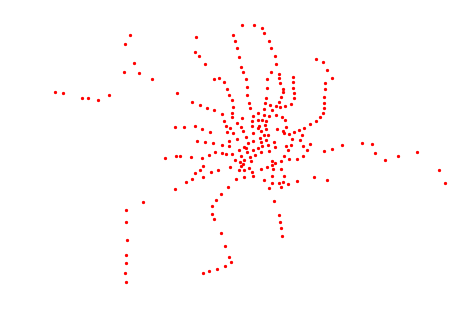

In [85]:
nx.draw(station_graph, station_coordinates, node_size=5)

In [86]:
station_with_road = nx.Graph(station_connection_info)

C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\JeremySun\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first cle

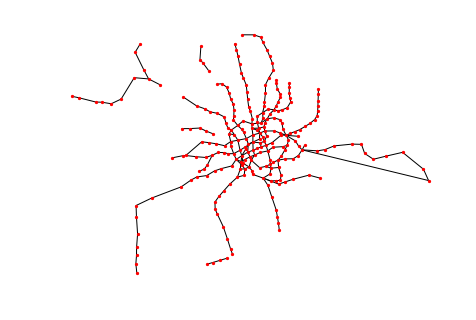

In [87]:
nx.draw(station_with_road, station_coordinates, node_size=5)

In [88]:
from collections import deque

In [89]:
def print_route(prev, start, destination):
    route = deque([destination])
    
    while prev[destination] != start:
        destination = prev[destination]
        route.appendleft(destination)
    route.appendleft(start)
    
    print('üöà'.join(route))

In [ ]:
def search(start, destination, connection_graph):
    visited = {start}
    q = deque([start])
    prev = {}
    while q:
        station = q.popleft()
        for next_ in connection_graph[station]:
            if next_ in visited: continue
            prev[next_] = station
            if next_ == destination:
                print_route(prev, start, destination)
                return
            visited.add(next_)
            q.append(next_)
    print('Êó†Ê≥ïÂà∞ËææÔºÅÔºÅÔºÅ')

In [90]:
def search(start, destination, connection_graph):
    visited = {start}
    q = deque([start])
    prev = {}
    
    while q:
        station = q.popleft()
        for next_ in connection_graph[station]:
            if next_ in visited:
                continue
            prev[next_] = station
            if next_ == destination:
                print_route(prev, start, destination)
                return
            visited.add(next_)
            q.append(next_)
            
    print("Êó†Ê≥ïÂà∞ËææËØ•Âú∞ÔºÅ")

In [91]:
def search_bfs(start, destination, connection_graph):
    visited = set()
    routes = deque([[start]])
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('üöà'.join(new_route))
                return 
            routes.appendleft(new_route)
        visited.add(frontier)
        
    print('Êó†Ê≥ïÂà∞ËææÔºÅÔºÅÔºÅ')

In [92]:
def search_dfs(start, destination, connection_graph):
    visited = set()
    routes = [[start]]
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in visited or next_ in cur: continue
            new_route = cur + [next_]
            if next_ == destination: 
                print('üöà'.join(new_route))
                return 
            routes.append(new_route)
        visited.add(frontier)
        
    print('Êó†Ê≥ïÂà∞ËææÔºÅÔºÅÔºÅ')

In [106]:
search("ÂêåÊµéÂ§ßÂ≠¶Á´ô", "‰∫§ÈÄöÂ§ßÂ≠¶Á´ô", station_connection_info)

ÂêåÊµéÂ§ßÂ≠¶Á´ôüöàÂõõÂπ≥Ë∑ØÁ´ôüöàÈÇÆÁîµÊñ∞ÊùëÁ´ôüöàÊµ∑‰º¶Ë∑ØÁ´ôüöàÂÆùÂ±±Ë∑ØÁ´ôüöà‰∏äÊµ∑ÁÅ´ËΩ¶Á´ôÁ´ôüöàÊ±â‰∏≠Ë∑ØÁ´ôüöàÂçó‰∫¨Ë•øË∑ØÁ´ôüöàÈùôÂÆâÂØ∫Á´ôüöàÊ±üËãèË∑ØÁ´ôüöà‰∫§ÈÄöÂ§ßÂ≠¶Á´ô


In [104]:
search_bfs("ÂêåÊµéÂ§ßÂ≠¶Á´ô", "‰∫§ÈÄöÂ§ßÂ≠¶Á´ô", station_connection_info)

ÂêåÊµéÂ§ßÂ≠¶Á´ôüöàÂõõÂπ≥Ë∑ØÁ´ôüöàÈÇÆÁîµÊñ∞ÊùëÁ´ôüöàÊµ∑‰º¶Ë∑ØÁ´ôüöàÂÆùÂ±±Ë∑ØÁ´ôüöà‰∏äÊµ∑ÁÅ´ËΩ¶Á´ôÁ´ôüöàÊ±â‰∏≠Ë∑ØÁ´ôüöàÂçó‰∫¨Ë•øË∑ØÁ´ôüöàÈùôÂÆâÂØ∫Á´ôüöàÊ±üËãèË∑ØÁ´ôüöà‰∫§ÈÄöÂ§ßÂ≠¶Á´ô


In [105]:
search_dfs("ÂêåÊµéÂ§ßÂ≠¶Á´ô", "‰∫§ÈÄöÂ§ßÂ≠¶Á´ô", station_connection_info)

ÂêåÊµéÂ§ßÂ≠¶Á´ôüöàÂõõÂπ≥Ë∑ØÁ´ôüöàÊõ≤Èò≥Ë∑ØÁ´ôüöàËôπÂè£Ë∂≥ÁêÉÂú∫Á´ôüöà‰∏úÂÆùÂÖ¥Ë∑ØÁ´ôüöàÂÆùÂ±±Ë∑ØÁ´ôüöà‰∏äÊµ∑ÁÅ´ËΩ¶Á´ôÁ´ôüöà‰∏≠ÊΩ≠Ë∑ØÁ´ôüöàÈïáÂù™Ë∑ØÁ´ôüöàÊõπÊù®Ë∑ØÁ´ôüöàÈöÜÂæ∑Ë∑ØÁ´ôüöàÊ±üËãèË∑ØÁ´ôüöà‰∫§ÈÄöÂ§ßÂ≠¶Á´ô


# ÔºàOptionalÔºâCreate different policies for transfer system.


As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path PriorityÔºàË∑ØÁ®ãÊúÄÁü≠‰ºòÂÖàÔºâ, Minimum Transfer Priority(ÊúÄÂ∞ëÊç¢‰πò‰ºòÂÖà), Comprehensive Priority(ÁªºÂêà‰ºòÂÖà)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

In [107]:
import heapq

In [108]:
def get_route(prev, start, destination):
    route = deque([destination])
    while prev[destination] != start:
        destination = prev[destination]
        route.appendleft(destination)
    route.appendleft(start)
    return route

In [109]:
def search_base_on_dijkstra(start, destination, connection_graph):
    """ÊúÄÁü≠Ë∑ùÁ¶ª"""
    prev = {} # ËÆ∞ÂΩï‰∏ä‰∏ÄÁ´ô
    station_dist = {start: 0} # ËÆ∞ÂΩïÊüê‰∏ÄÁ´ô‰∏éËµ∑ÁÇπÁöÑÊúÄËøëË∑ùÁ¶ª
    min_dist_heap = [[0, start]] # Â∞èÈ°∂Â†Ü
    while min_dist_heap:
        dist, station = heapq.heappop(min_dist_heap) # ÊãøÂá∫ÂΩìÂâçË∑ùÁ¶ªËµ∑ÁÇπÊúÄËøëÁöÑÁ´ôÁÇπ
        if station == destination:
            route = get_route(prev, start, destination)
            print('üöà'.join(route))
            return 
        for next_ in connection_graph[station]:
            tmp_dist = get_geo_distance(station, next_) + dist
            if next_ in station_dist and tmp_dist < station_dist[next_]: # Â∑≤ÁªèÊõ¥Êñ∞ËøáÂàô‰∏éÂéüË∑ùÁ¶ªÊØîËæÉÔºåÊõ¥Êñ∞ÂàôÊõ¥Êñ∞
                station_dist[next_] = tmp_dist
                prev[next_] = station
                for i in range(len(min_dist_heap)):
                    d, s = min_dist_heap[i]
                    if s == next_:
                        min_dist_heap[i][0] = tmp_dist
                        break
            elif next_ not in station_dist:
                heapq.heappush(min_dist_heap, [tmp_dist, next_])
                prev[next_] = station
                station_dist[next_] = tmp_dist
                
    print('Êó†Ê≥ïÂà∞ËææÔºÅÔºÅÔºÅ') 

In [110]:
search_base_on_dijkstra('ÂêåÊµéÂ§ßÂ≠¶Á´ô', 'Ê≤àÊùúÂÖ¨Ë∑ØÁ´ô', station_connection_info)

ÂêåÊµéÂ§ßÂ≠¶Á´ôüöàÂõõÂπ≥Ë∑ØÁ´ôüöàÈÇÆÁîµÊñ∞ÊùëÁ´ôüöàÊµ∑‰º¶Ë∑ØÁ´ôüöàÂõõÂ∑ùÂåóË∑ØÁ´ôüöàÂ§©ÊΩºË∑ØÁ´ôüöàÂçó‰∫¨‰∏úË∑ØÁ´ôüöàË±´Âõ≠Á´ôüöàËÄÅË•øÈó®Á´ôüöàÈôÜÂÆ∂ÊµúË∑ØÁ´ôüöàË•øËóèÂçóË∑ØÁ´ôüöà‰∏≠ÂçéËâ∫ÊúØÂÆ´Á´ôüöàËÄÄÂçéË∑ØÁ´ôüöàÊàêÂ±±Ë∑ØÁ´ôüöàÊù®ÊÄùÁ´ôüöà‰∏úÊñπ‰ΩìËÇ≤‰∏≠ÂøÉÁ´ôüöàÂáåÂÖÜÊñ∞ÊùëÁ´ôüöàËä¶ÊÅíË∑ØÁ´ôüöàÊµ¶Ê±üÈïáÁ´ôüöàÊ±üÊúàË∑ØÁ´ôüöàËÅîËà™Ë∑ØÁ´ôüöàÊ≤àÊùúÂÖ¨Ë∑ØÁ´ô


In [111]:
def get_transfer(route):
    """Êç¢‰πòÊ¨°Êï∞"""
    count = 0
    for i in range(1,len(route)-1):
        if len(station_connection_info[route[i]]) <= 2: 
            continue
        prev, after = station_line_map[route[i-1]], station_line_map[route[i+1]]
        # ‰∏ªÁ∫øÊîØÁ∫ø‰∏çÁÆóÊç¢‰πò
        for j in range(len(prev)):
            if prev[j].endswith('‰∏ªÁ∫ø') or prev[j].endswith('ÊîØÁ∫ø'):
                prev[j] = prev[j][:-2]
        for k in range(len(after)):
            if after[k].endswith('‰∏ªÁ∫ø') or after[k].endswith('ÊîØÁ∫ø'):
                after[k] = after[k][:-2]
        if not set(prev) & set(after): count += 1
    return count

In [112]:
def get_distance(route):
    """Ë∑ùÁ¶ª"""
    distance = 0
    for i in range(1, len(route)):
        distance += get_geo_distance(route[i-1], route[i])
    return distance

In [113]:
def search_bfs(start, destination, connection_graph, strategy, by_way=[]):
#     visited = set()
    routes = [[start]]
    while routes:
        cur = routes.pop()
        frontier = cur[-1]
        for next_ in connection_graph[frontier]:
            if next_ in cur: 
                continue
            new_route = cur + [next_]
            if next_ == destination: 
                for s in by_way:
                    if s not in new_route:
                        break
                else:
                    print('üöà'.join(new_route))
                    return
            else:
                routes.append(new_route)
        routes.sort(key=strategy, reverse=True)
#         visited.add(frontier)
    print('Êó†Ê≥ïÂà∞ËææÔºÅÔºÅÔºÅ')

In [114]:
search_bfs('ÂêåÊµéÂ§ßÂ≠¶Á´ô', 'ËÄÅË•øÈó®Á´ô', station_connection_info, get_distance, by_way=['Êõ≤Èò≥Ë∑ØÁ´ô'])

ÂêåÊµéÂ§ßÂ≠¶Á´ôüöàÂõõÂπ≥Ë∑ØÁ´ôüöàÊõ≤Èò≥Ë∑ØÁ´ôüöàËôπÂè£Ë∂≥ÁêÉÂú∫Á´ôüöàË•øËóèÂåóË∑ØÁ´ôüöà‰∏≠ÂÖ¥Ë∑ØÁ´ôüöàÊõ≤ÈòúË∑ØÁ´ôüöà‰∫∫Ê∞ëÂπøÂú∫Á´ôüöàÂ§ß‰∏ñÁïåÁ´ôüöàËÄÅË•øÈó®Á´ô


In [115]:
search_bfs('ÂêåÊµéÂ§ßÂ≠¶Á´ô', 'ËÄÅË•øÈó®Á´ô', station_connection_info, get_distance)

ÂêåÊµéÂ§ßÂ≠¶Á´ôüöàÂõõÂπ≥Ë∑ØÁ´ôüöàÈÇÆÁîµÊñ∞ÊùëÁ´ôüöàÊµ∑‰º¶Ë∑ØÁ´ôüöàÂõõÂ∑ùÂåóË∑ØÁ´ôüöàÂ§©ÊΩºË∑ØÁ´ôüöàÂçó‰∫¨‰∏úË∑ØÁ´ôüöàË±´Âõ≠Á´ôüöàËÄÅË•øÈó®Á´ô


In [116]:
search_bfs('ÂêåÊµéÂ§ßÂ≠¶Á´ô', 'ÂÆùÂ±±Ë∑ØÁ´ô', station_connection_info, get_transfer, by_way=['‰∏úÂÆùÂÖ¥Ë∑ØÁ´ô'])

ÂêåÊµéÂ§ßÂ≠¶Á´ôüöàÂõõÂπ≥Ë∑ØÁ´ôüöàÈÇÆÁîµÊñ∞ÊùëÁ´ôüöàÊµ∑‰º¶Ë∑ØÁ´ôüöàÂõõÂ∑ùÂåóË∑ØÁ´ôüöàÂ§©ÊΩºË∑ØÁ´ôüöàÂçó‰∫¨‰∏úË∑ØÁ´ôüöàË±´Âõ≠Á´ôüöàËÄÅË•øÈó®Á´ôüöàÊñ∞Â§©Âú∞Á´ôüöàÈôïË•øÂçóË∑ØÁ´ôüöàÂçó‰∫¨Ë•øË∑ØÁ´ôüöà‰∫∫Ê∞ëÂπøÂú∫Á´ôüöàÊõ≤ÈòúË∑ØÁ´ôüöà‰∏≠ÂÖ¥Ë∑ØÁ´ôüöàË•øËóèÂåóË∑ØÁ´ôüöàËôπÂè£Ë∂≥ÁêÉÂú∫Á´ôüöà‰∏úÂÆùÂÖ¥Ë∑ØÁ´ôüöàÂÆùÂ±±Ë∑ØÁ´ô


In [117]:
search_bfs('ÂêåÊµéÂ§ßÂ≠¶Á´ô', 'ÂÆùÂ±±Ë∑ØÁ´ô', station_connection_info, get_transfer)

ÂêåÊµéÂ§ßÂ≠¶Á´ôüöàÂõõÂπ≥Ë∑ØÁ´ôüöàÈÇÆÁîµÊñ∞ÊùëÁ´ôüöàÊµ∑‰º¶Ë∑ØÁ´ôüöàÂÆùÂ±±Ë∑ØÁ´ô


## Test your result with commercial applications. 

- Â∞Ü‰Ω†ÁöÑÁªìÊûúÂíåÈ´òÂæ∑Âú∞ÂõæÊàñËÄÖÁôæÂ∫¶Âú∞ÂõæËøõË°åÊØîËæÉÔºåÂ¶ÇÊûúÊúâ‰∏çÂêåÔºåËØ∑ÂàÜÊûêÂéüÂõ†„ÄÇ
    - ÂíåÈ´òÂæ∑Âú∞ÂõæËøõË°åÂàÜÊûêÊØîËæÉÔºö
        1. Â¶ÇÊûú‰∏ç‰ΩøÁî® **by_way** ÂèÇÊï∞Ë∑ØÁ®ãÊúÄÁü≠ÂíåÊúÄÂ∞ëÊç¢‰πòÁöÑÁªìÊûúÂü∫Êú¨‰∏éÈ´òÂæ∑‰∏ÄËá¥Ôºå‰ΩÜÁî±‰∫éÈÉΩÊòØÂü∫‰∫éË¥™ÂøÉÂπ∂ÈùûÂÖ®Â±ÄÊúÄ‰ºòÔºåÊâÄ‰ª•ÊúâÊó∂‰ºö‰∏ç‰∏ÄÊ†∑Ôºõ
        2. ‰ΩøÁî®‰∫Ü **by_way** ‰πãÂêéÔºåÁî±‰∫é‰∏çËÉΩÂéªÈô§Â∑≤ËÆøÈóÆËøáÁöÑÁ´ôÁÇπÊêúÁ¥¢Á©∫Èó¥Â§ßÂ§ßÂ¢ûÂä†Ôºå‰∏ÄÂÆöÁ®ãÂ∫¶‰∏äÊîæÂ§ß‰∫ÜÂü∫‰∫éË¥™ÂøÉÁöÑÁº∫ÁÇπÔºåÊõ¥Â§ßÊ¶ÇÁéáÂíåÈ´òÂæ∑Âú∞Âõæ‰∏ç‰∏ÄËá¥Ôºå‰∏îËøêË°åÊó∂Èó¥ÈöèÁùÄË∑ùÁ¶ªÂ¢ûÂ§ßËÄåÂ§ßÂ§ßÂ¢ûÂä†„ÄÇ

**ÊÅ≠ÂñúÔºåÂÆåÊàêÊú¨Ê¨°ËØæÁ®ãÔºå‰Ω†ÂØπÂ∏∏Áî®ÁöÑ‰∫∫Â∑•Êô∫ËÉΩÊñπÊ≥ï‰ª•ÂèäÊúâ‰∏ÄÂÆöÁöÑ‰∫ÜËß£‰∫Ü„ÄÇÂü∫‰∫éËßÑÂàôÁöÑÔºåÂü∫‰∫éÊ¶ÇÁéáÊ®°ÂûãÁöÑÔºåÂü∫‰∫éÊêúÁ¥¢ÁöÑÔºåÂü∫‰∫éÊú∫Âô®Â≠¶‰π†ÁöÑ„ÄÇÂèØ‰ª•ËØ¥ÔºåÊàë‰ª¨Áé∞Âú®ÈÄöÂ∏∏ËßÅÂà∞ÁöÑÊñπÊ≥ïÈÉΩËÉΩÂ§üÂΩíÂ±ûÂà∞ËøôÂá†Á±ªÊñπÊ≥ï‰∏≠„ÄÇËøôÂ∞±ÊòØ‰∫∫Â∑•Êô∫ËÉΩÔºåÂπ∂Ê≤°ÊúâÂæàÈöæÊòØÂêßÔºü ÁªßÁª≠Âä†Ê≤πÔºÅ**

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)